In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Visual configuration
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (14, 7)

# File path to the combined CSV file
file_path = os.path.join('..', 'data', 'all_stocks_2017_2025.csv')

# Load the data, skip the first row, no header
df = pd.read_csv(file_path)

# Set correct column names manually
df.columns = ['Date', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA', 'META', 'JPM', 'NFLX', '^GSPC']

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])
                            
# Display the first few rows
print("First 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


First 5 rows:


,Date,AAPL,MSFT,AMZN,GOOG,TSLA,META,JPM,NFLX,^GSPC
0,2017-07-03,33.425400,62.272095,47.682999,44.669479,23.507999,147.620132,74.445312,146.169998,2429.010010
1,2017-07-05,33.562817,63.103382,48.570000,45.316132,21.806000,149.519714,75.191795,147.610001,2432.540039
2,2017-07-06,33.246040,62.637486,48.257000,45.066612,20.588667,148.008011,74.950989,146.250000,2409.750000
3,2017-07-07,33.583778,63.450489,48.938000,45.658100,20.881332,150.613724,75.328247,150.179993,2425.179932
4,2017-07-10,33.788765,63.925491,49.823502,46.165581,21.070000,152.662491,74.798470,152.669998,2427.429932



Missing values per column:
Date     0
AAPL     0
MSFT     0
AMZN     0
GOOG     0
TSLA     0
META     0
JPM      0
NFLX     0
^GSPC    0
dtype: int64


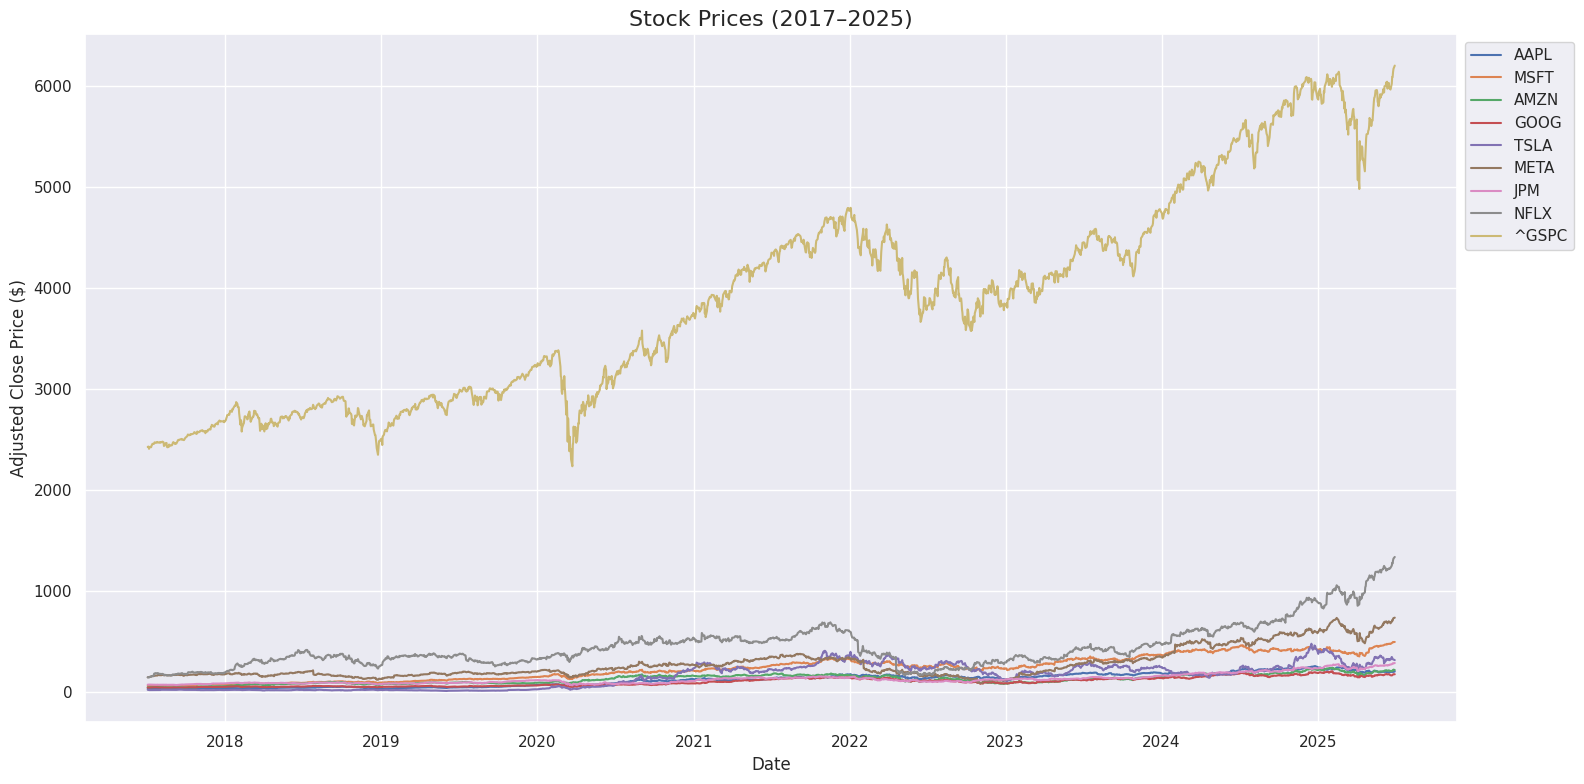

In [2]:
# Plot all stocks
plt.figure(figsize=(16, 8))
for company in df.columns[1:]:  # skip 'Date'
    plt.plot(df['Date'], df[company], label=company)

plt.title('Stock Prices (2017–2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


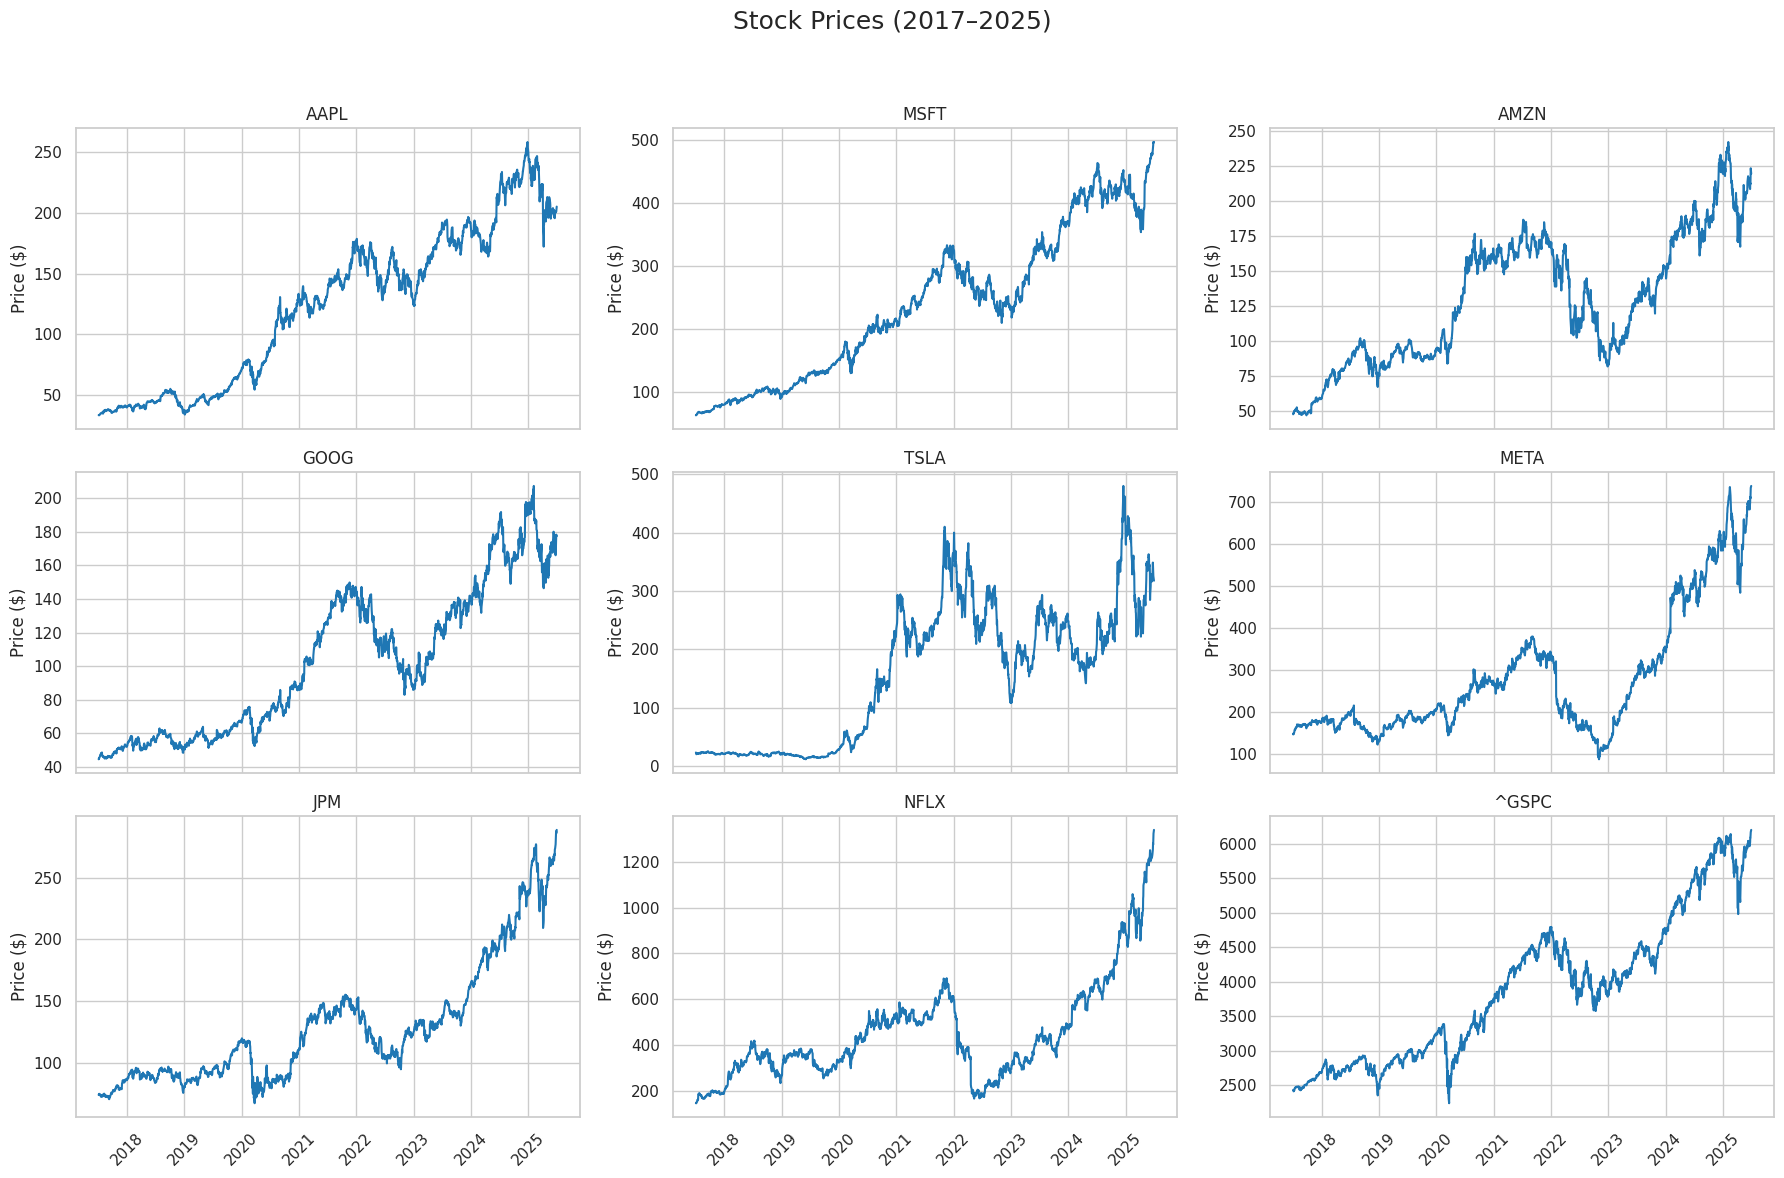

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (as before)
file_path = '../data/all_stocks_2017_2025.csv'
df = pd.read_csv(file_path, skiprows=1, header=None)
df.columns = ['Date', 'AAPL', 'MSFT', 'AMZN', 'GOOG', 'TSLA', 'META', 'JPM', 'NFLX', '^GSPC']
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(subset=['Date'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Plot setup
sns.set(style='whitegrid')
num_stocks = len(df.columns) - 1
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# Plot each stock in its subplot
for i, stock in enumerate(df.columns[1:]):  # Skip 'Date'
    axes[i].plot(df['Date'], df[stock], label=stock, color='tab:blue')
    axes[i].set_title(stock)
    axes[i].set_ylabel('Price ($)')
    axes[i].tick_params(axis='x', rotation=45)

# Final adjustments
plt.suptitle('Stock Prices (2017–2025)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
